### Part One: Getting to Know Pandas.


Read the data using the read_html method from the table "Коефіцієнт народжуваності в регіонах України (1950—2019)"

[LINK](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8)

### 1. Output the first rows of the table using the head method:

In [1]:
import pandas as pd

source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


### 2. Define the number of rows and columns in the dataframe (shape attribute):

In [2]:
print("The number of rows and columns:", df.shape)

The number of rows and columns: (28, 9)


### 3. In the table, replace the value "—" with the value NaN:

In [3]:
import numpy as np

df.replace('—', np.nan, inplace=True)
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

### 4. Define the types of all columns using dataframe.dtypes:

In [4]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

### 5. Replace non-numeric (where was the symbol "—") column types with numeric ones:

In [5]:
df[['2014', '2019']] = df[['2014', '2019']].astype("float64")

print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


### 6. Calculate the percentage of blanks in each column (use isnull and sum methods):

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


### 7. Delete the countrywide data from the table, the last row of the table:

In [7]:
df = df.drop(df.index[-1])
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

### 8. Replace missing data in columns with the average values of those columns (fillna method):

In [8]:
df = df.fillna(df.mean())
print(round(df, 3))

               Регіон    1950    1960  1970  1990  2000  2012    2014    2019
0                Крим  23.000  20.600  16.0  13.0   7.3  12.6  11.144   8.017
1           Вінницька  22.400  19.200  14.2  12.4   8.4  11.2  10.900   7.600
2           Волинська  24.700  25.000  17.9  15.3  11.2  14.8  14.100  10.100
3    Дніпропетровська  20.400  20.400  15.1  12.3   7.1  11.2  11.100   7.100
4            Донецька  27.100  21.400  14.0  10.9   6.1   9.8   8.200   8.017
5         Житомирська  26.100  22.300  15.9  12.9   8.9  12.2  12.000   7.900
6        Закарпатська  31.400  27.300  20.7  16.8  11.5  15.1  14.600  10.400
7          Запорізька  21.900  19.700  15.0  12.4   7.1  10.6  10.600   6.800
8   Івано-Франківська  24.300  24.800  18.2  15.5  10.3  12.4  12.200   8.800
9            Київська  20.400  18.900  15.6  12.3   7.3  12.2  12.100   8.000
10     Кіровоградська  21.600  17.100  14.5  12.6   7.9  11.0  10.800   6.800
11          Луганська  26.200  23.500  14.4  11.6   6.2   9.6   

<ipython-input-8-a22546391300>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


### 9. Get a list of regions where the birth rate in 2019 was higher than the average for Ukraine:

In [9]:
# The average value of fertility levels for each region
avgbirth_by_region = df.groupby('Регіон')['2019'].mean()

# The average value of fertility levels in Ukraine
avgbirth_by_ukraine = df['2019'].mean()

# Choose the regions where the birth rate is higher than the average for Ukraine
regions_above_average = avgbirth_by_region[avgbirth_by_region > avgbirth_by_ukraine]

print("The average value of fertility levels in Ukraine: ", avgbirth_by_ukraine)
print(regions_above_average)

The average value of fertility levels in Ukraine:  8.017391304347827
Регіон
Івано-Франківська     8.8
Волинська            10.1
Закарпатська         10.4
Київ                 11.0
Львівська             8.7
Одеська               8.8
Рівненська           10.7
Херсонська            8.1
Чернівецька           9.2
Name: 2019, dtype: float64


### 10. Which region had the highest birth rate in 2014:

In [10]:
region_highbirt = df.loc[df['2014'].idxmax(), 'Регіон']

print("The region with the highest birth rate in 2014:", region_highbirt)

The region with the highest birth rate in 2014: Рівненська


### 11. Construct a bar chart of birth rates by region in 2019:

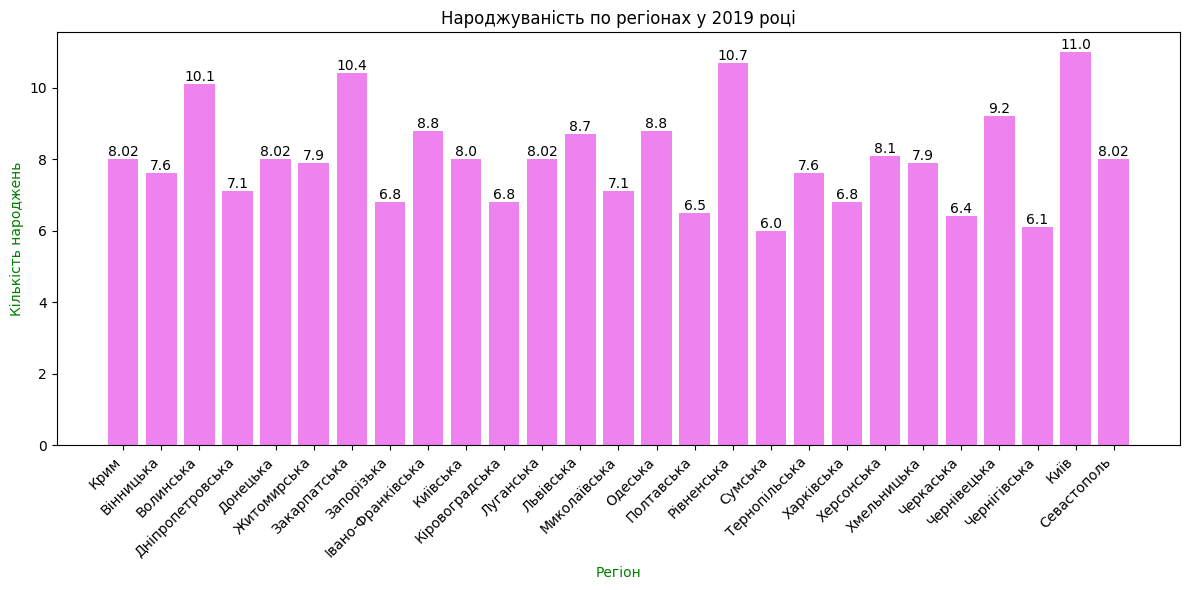

In [11]:
import matplotlib.pyplot as plt

birth_rate_2019 = df[['Регіон', '2019']]

plt.figure(figsize=(12, 6))
bars = plt.bar(birth_rate_2019['Регіон'], birth_rate_2019['2019'], color='violet')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон', color='green')
plt.ylabel('Кількість народжень', color='green')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()